In [44]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

#Import the various libraries I'll be using in my analysis

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/Student_Performance.csv')

Mounted at /content/gdrive


#Mount the dataset and label it as "df". The dataset I'm using was found on Kaggle.com, consisting of 10,000 student records, with each record containing information about various predictors and a performance index. Data compiled by Nikhil Narayan. Link = https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/

In [4]:
df.shape

(10000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [12]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#Explore the basic information the dataset provides

In [13]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
extracurricular_activities_values = {"Yes": 1, "No": 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(extracurricular_activities_values)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#Relabel the "Extracurricular Activities column from a "Yes, No" into a binary "1, 0" to make it easier to work with

In [15]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


#Take a look at the dataset's descriptive statistics

#Upon my initial look at the dataset there are two questions I intend to answer based on the data. The first is: What is the relationship between sleep hours and student performance? The second is: Is there a significant difference in the performance of students based on their involvement in extracurricular activities?

#Hypothesis 1:

Null Hypothesis: There is no correlation between "Sleep Hours" and the "Performance Index"

Alternative Hypothesis: There is a significant correlation between "Sleep Hours" and the "Performance Index"

(The "Performance Index" is: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.)

In [16]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

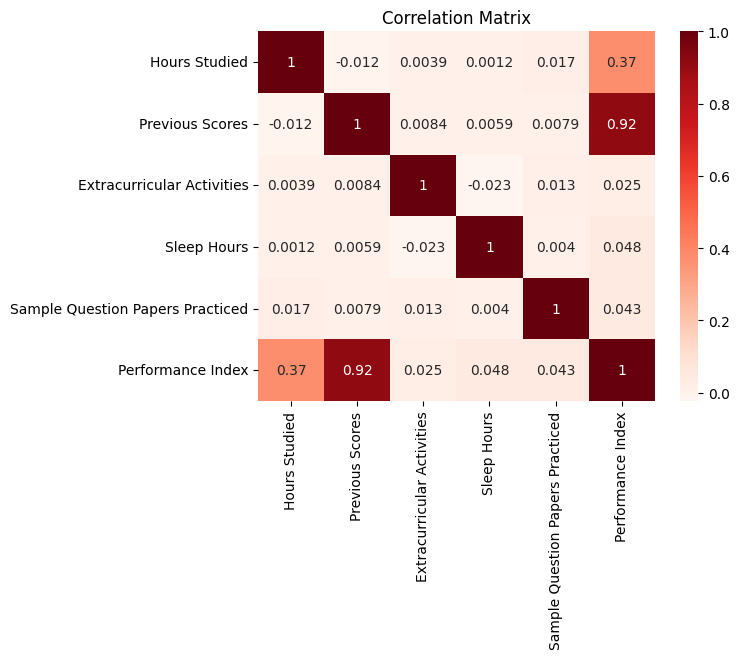

In [19]:
sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

#Visualize the correlations between columns using seaborn as to be able to take a simple look at how the data is related.

#

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

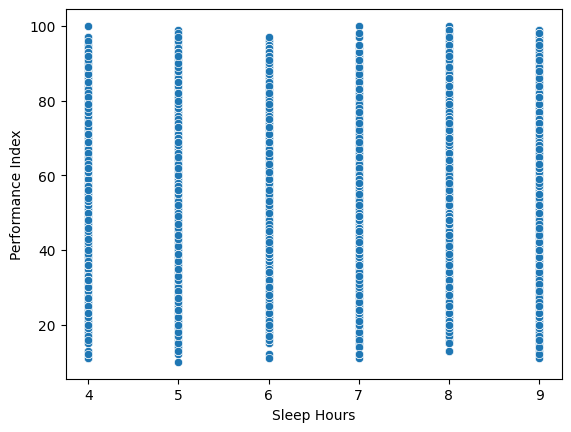

In [27]:
sns.scatterplot(x="Sleep Hours", y="Performance Index", data=df)

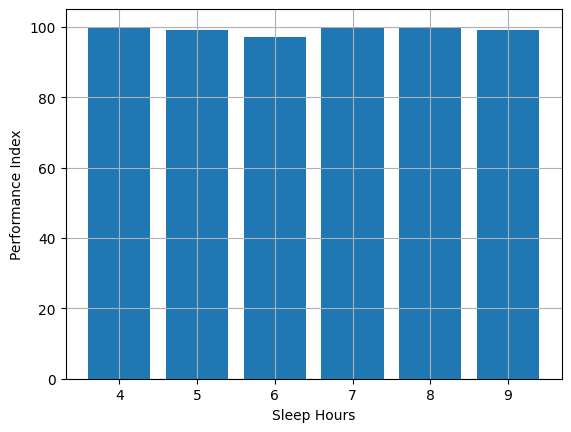

In [29]:
plt.bar(df['Sleep Hours'], df['Performance Index'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.grid(True)

In [33]:
stats.pearsonr(df['Sleep Hours'], df['Performance Index'])

PearsonRResult(statistic=0.04810583543435261, pvalue=1.4885369617939595e-06)

#Taking a look at a scatter plot between "Sleep Hours" and "Performance Index", as well as a bar chart and the individual Pearson correlation coefficient, shows a pretty clear picture when it comes to the relationship between the two variables. It's what I would call a positive relationship, but quite a weak one. As such I find it difficult to accept the alternative hypothesis of there being a "significant" correlation between the two and, especially when you look at the charts, have a much easier time accepting the null hypothesis: There being essentially no correlation between "Sleep Hours" and "Performance Index"

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

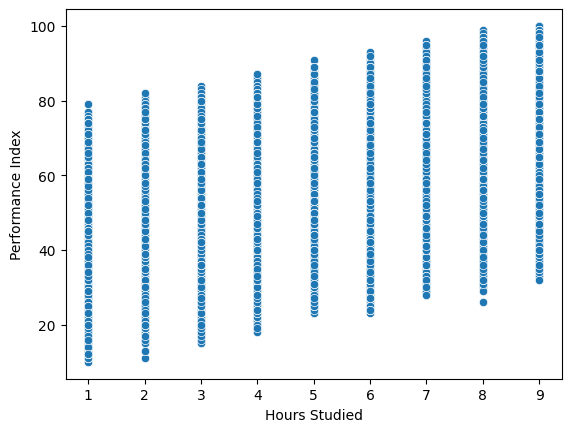

In [30]:
sns.scatterplot(x="Hours Studied", y="Performance Index", data=df)

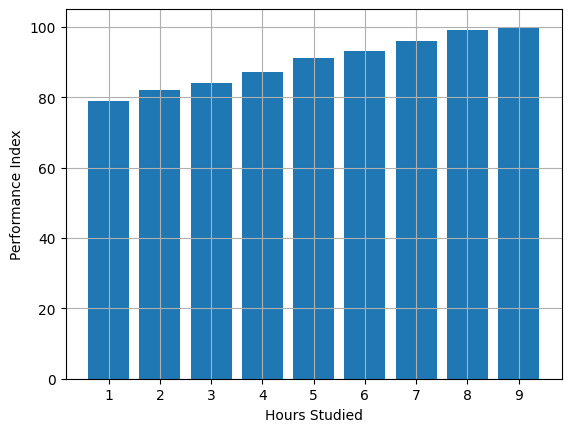

In [31]:
plt.bar(df['Hours Studied'], df['Performance Index'])
plt.xticks(df['Hours Studied'].unique())
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)

In [32]:
df['Hours Studied'].corr(df['Performance Index'])

0.3737303506987236

#Alternatively, although not directly related to one of my hypotheses, it's much easier to see the positive correlation between "Hours Studied" and "Performance Index"

#Hypothesis 2:

Null hypothesis: There is no significant difference in the performance of students who participate in extracurricular activities and those who do not

Alternate Hypothesis: There is a significant difference in the performance of students who participate in extracurricular activities and those who do not.

(I would define "Extracurricular Activities" as optional activities in relation to one's school such as sports, music, clubs, etc.)

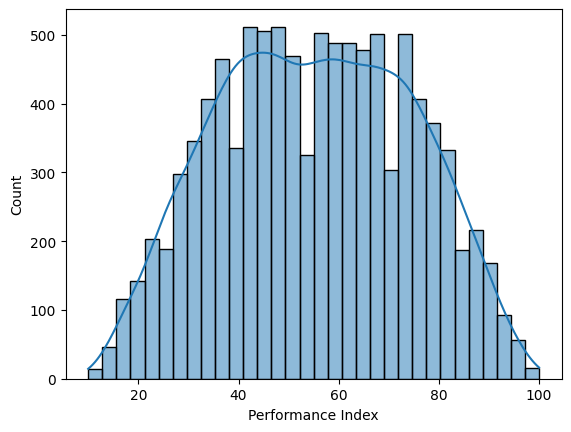

In [35]:
ax = sns.histplot(df['Performance Index'], kde=True)

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

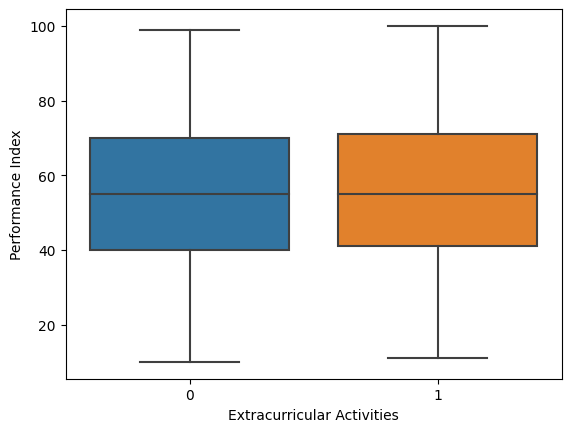

In [38]:
sns.boxplot(y="Performance Index", x="Extracurricular Activities", data=df)

<Axes: xlabel='Performance Index', ylabel='Previous Scores'>

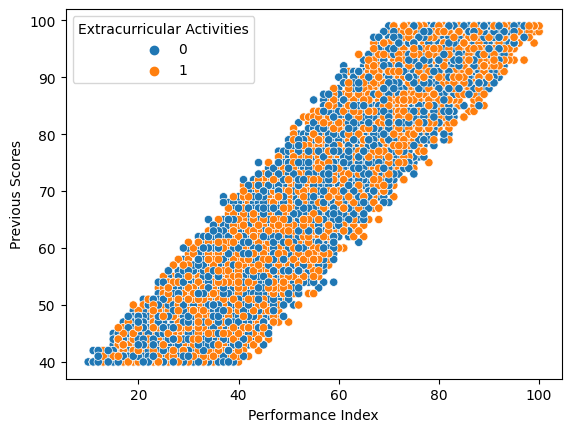

In [39]:
sns.scatterplot(x="Performance Index", y="Previous Scores", hue="Extracurricular Activities",  data=df)

#Taking a closer look at a histogram of the "Performance Index", it appears to be fairly evenly distributed. The box plot shows the performance of those involved with extracurricular activities to be possibly slightly higher. When charting "Performance Index" against what was found to be extremely correlated to it, "Previous Scores" (a correlation coefficient of .92), with the context of "Extracurricular Activities" (0 being not involved, 1 being participating in such activities), it doesn't immediately show me there is a big difference between participating or not.

In [41]:
yesextra = df.iloc[(df['Extracurricular Activities'] == 1).values]
yesextra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     4948 non-null   int64  
 1   Previous Scores                   4948 non-null   int64  
 2   Extracurricular Activities        4948 non-null   int64  
 3   Sleep Hours                       4948 non-null   int64  
 4   Sample Question Papers Practiced  4948 non-null   int64  
 5   Performance Index                 4948 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 270.6 KB


In [42]:
noextra = df.iloc[(df['Extracurricular Activities'] == 0).values]
noextra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5052 entries, 1 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     5052 non-null   int64  
 1   Previous Scores                   5052 non-null   int64  
 2   Extracurricular Activities        5052 non-null   int64  
 3   Sleep Hours                       5052 non-null   int64  
 4   Sample Question Papers Practiced  5052 non-null   int64  
 5   Performance Index                 5052 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 276.3 KB


#I'll first split the dataset into those who participate in extracurricular activities and those who do not. The sample sizes of the two are close enough to each other in size and large enough in general that I should be able to get a good idea of a significant difference in means by running an independent-samples t-test on the two groups.

In [43]:
stats.ttest_ind(yesextra['Performance Index'], noextra['Performance Index'])

TtestResult(statistic=2.452987248811042, pvalue=0.014184491568554492, df=9998.0)

In [45]:
sample_1_n = yesextra.shape[0]
sample_2_n = noextra.shape[0]
sample_1_mean = yesextra['Performance Index'].mean()
sample_2_mean = noextra['Performance Index'].mean()
sample_1_var = yesextra['Performance Index'].var()
sample_2_var = noextra['Performance Index'].var()

In [46]:
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -1.6954076880951225 and -0.18934784706356655.


#When viewing the results of the independent-samples t-test, though the t-stat is not extremely high, it is above the critical value for a two-tailed test with an alpha of .05 and degrees of freedom being 9998. With the p value being at a sufficiently low enough level we can determine the results of the independent-samples t-test to show that there is indeed a significant difference in the means of the sample sizes.

#As such, I find there to be enough evidence to reject the null hypothesis, and say that there is indeed a significant difference in the "Performance Index" between those who participate in extracurricular activities and those who do not.

#Throughout this look at the data, I had hoped to be able to determine the relative value of certain metrics when it comes to how well a student can perform. I hope students, parents, or related professionals can find value in the exploration of the data when it comes to what variables have the biggest impact on performance.

#When looking at the correlation matrix, there appears to be a weak positive correlation between performance, sleep hours, and practice papers completed. There does appear to be a much stronger positive correlation when it comes to performance and hours studied, so I would definitely recommend that as the key variable to be aware of.

#As per the testing, there is enough of a difference in the average performance of students (between those who participate in extracurricular activities and those who do not) that I would also give my recommendation to trying out any extracurricular activity that might interest an individual, given the means and opportunity are available.